In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os.path
from saveDataset import save_data

# Helper libraries
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image

set rootpath= path of the directory containing 'image-recognition-tensorflow-master'

In [2]:
rootpath='D:\hackathon'

In [3]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [4]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
#                 if re.match('chihuahua.*', file):
                if re.match('plastic.*', file):
                        images.append(img)
                        labels.append(0)
#                 elif re.match('muffin.*', file):
                elif re.match('paper.*', file):
                        images.append(img)
                        labels.append(1)
                else:
                    images.append(img)
                    labels.append(1)
        return (np.array(images), np.array(labels))

In [5]:
def shuffle_examples(X,Y):
    dim= X.shape
    X= np.reshape(X,(X.shape[0],-1))
    Y=Y.reshape(-1,1)
    X= np.append(X, Y, axis=1)
    
    np.random.seed(0)
    np.random.shuffle(X)
    
    A=np.array([])
    
    for i in range(X.shape[1]-1):
        if i==0:
            A= np.array(X[:,i]).reshape(-1,1)
        else:
            A=np.append(A,np.array(X[:,i]).reshape(-1,1),axis=1)

    Y= np.array(X[:,X.shape[1]-1])
    
    A= np.reshape(A,dim)
    
    return A,Y
    

In [6]:
maxsize = 100, 100

In [7]:
# (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\plastic_paper', maxsize)
# (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\plastic_paper/test_set', maxsize)

# (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\chihuahua-muffin', maxsize)
# (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\chihuahua-muffin/test_set', maxsize)

(train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\small_plastic_paper', maxsize)
(test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\small_plastic_paper/test_set', maxsize)


print(train_images.shape)
train_images, train_labels = shuffle_examples(train_images, train_labels)
test_images, test_labels = shuffle_examples(test_images, test_labels)
print('here')
data={
    'train_images': np.reshape(train_images,(train_images.shape[0],-1)),
    'train_labels':train_labels.reshape(-1,1),
    'test_images':np.reshape(test_images,(test_images.shape[0],-1)),
    'test_labels':test_labels.reshape(-1,1)
}
os.chdir('D:\hackathon\image_classification')
# save_data(data)



# if(os.path.exists('train_images.npy')==False):
#     (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\plastic_paper', maxsize)
#     (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\plastic_paper/test_set', maxsize)

# #     (train_images, train_labels) = load_image_dataset('D:\hackathon\image_classification\chihuahua-muffin', maxsize)
# #     (test_images, test_labels) = load_image_dataset('D:\hackathon\image_classification\chihuahua-muffin/test_set', maxsize)
#     print(train_images.shape)
#     train_images, train_labels = shuffle_examples(train_images, train_labels)
#     test_images, test_labels = shuffle_examples(test_images, test_labels)
#     print('here')
#     data={
#         'train_images': np.reshape(train_images,(train_images.shape[0],-1)),
#         'train_labels':train_labels.reshape(-1,1),
#         'test_images':np.reshape(test_images,(test_images.shape[0],-1)),
#         'test_labels':test_labels.reshape(-1,1)
#     }
#     os.chdir('D:\hackathon\image_classification')
#     save_data(data)
    
# else:
#     print('found')
#     os.chdir('D:\hackathon\image_classification')
#     a = np.load('train_images.npy')
#     train_images=a
#     a = np.load('train_labels.npy')
#     train_labels=a
#     print(a.shape)
#     a = np.load('test_images.npy')
#     test_images=a
#     a = np.load('test_labels.npy')
#     test_labels=a
#     print(a.shape)
    
# #     train_images = genfromtxt('train_images.csv', delimiter=',')
# #     train_labels = genfromtxt('train_labels.csv', delimiter=',')
# #     test_images = genfromtxt('test_images.csv', delimiter=',')
# #     test_labels = genfromtxt('test_labels.csv', delimiter=',')
#     train_images= np.reshape(train_images,(train_images.shape[0],maxsize[0],maxsize[1]))
#     test_images= np.reshape(test_images,(test_images.shape[0],maxsize[0],maxsize[1]))
#     train_labels= train_labels.reshape(train_labels.shape[0])
#     test_labels= test_labels.reshape(test_labels.shape[0])



(140, 100, 100)
here


In [8]:
# class_names = ['chihuahua', 'muffin']
class_names = ['plastic', 'paper']




In [9]:

print(train_images.shape)

(140, 100, 100)


In [10]:

print(train_labels.shape)

(140,)


In [11]:
print(test_images.shape)
print(test_labels)

(40, 100, 100)
[0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1
 0 1 1]


In [12]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

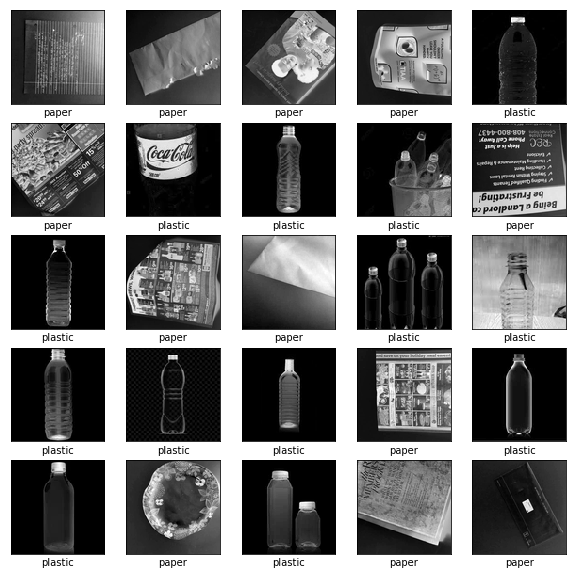

In [13]:
display_images(train_images, train_labels)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)
print(test_images.shape)

(140, 100, 100)
(40, 100, 100)


In [15]:
# Setting up the layers.

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(100, 100)),
#         keras.layers.Dense(128, activation=tf.nn.sigmoid),
#         keras.layers.Dense(16, activation=tf.nn.sigmoid),
#     keras.layers.Dense(2, activation=tf.nn.softmax)
# ])

model = keras.models.Sequential([
                keras.layers.Flatten(input_shape = ( maxsize)),
                keras.layers.Dense(512, activation=tf.nn.relu),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(16, activation=tf.nn.relu),
        keras.layers.Dense(2, activation=tf.nn.softmax)
        ])

# model = keras.models.Sequential([
#                 keras.layers.Flatten(input_shape = ( 100, 100)),
#                 keras.layers.Dense(1024, activation=tf.nn.relu),
#                 keras.layers.Dropout(0.5),
#                 keras.layers.Dense(512, activation=tf.nn.relu),
#                 keras.layers.Dropout(0.5),
#                 keras.layers.Dense(64, activation=tf.nn.relu),
#                 keras.layers.Dense(16, activation=tf.nn.relu),
#         keras.layers.Dense(2, activation=tf.nn.softmax)
#         ])

In [16]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=100)

Train on 140 samples
Epoch 1/100
140/140 [==============================] - 1s 5ms/sample - loss: 1.1887 - accuracy: 0.4857
Epoch 2/100
140/140 [==============================] - 0s 940us/sample - loss: 0.7244 - accuracy: 0.5143
Epoch 3/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.6856 - accuracy: 0.5786
Epoch 4/100
140/140 [==============================] - 0s 969us/sample - loss: 0.6811 - accuracy: 0.4857
Epoch 5/100
140/140 [==============================] - 0s 962us/sample - loss: 0.6866 - accuracy: 0.4714
Epoch 6/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.6876 - accuracy: 0.5571
Epoch 7/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.7077 - accuracy: 0.4643
Epoch 8/100
140/140 [==============================] - 0s 933us/sample - loss: 0.6884 - accuracy: 0.5357
Epoch 9/100
140/140 [==============================] - 0s 955us/sample - loss: 0.6843 - accuracy: 0.5500
Epoch 10/100
140/140 [====================

140/140 [==============================] - 0s 1ms/sample - loss: 0.2726 - accuracy: 0.8786
Epoch 80/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.2455 - accuracy: 0.8786
Epoch 81/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.2785 - accuracy: 0.8786
Epoch 82/100
140/140 [==============================] - 0s 990us/sample - loss: 0.3089 - accuracy: 0.8500
Epoch 83/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.4010 - accuracy: 0.8286
Epoch 84/100
140/140 [==============================] - 0s 976us/sample - loss: 0.4079 - accuracy: 0.8071
Epoch 85/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.4286 - accuracy: 0.8286
Epoch 86/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.3110 - accuracy: 0.8571
Epoch 87/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.2563 - accuracy: 0.8714
Epoch 88/100
140/140 [==============================] - 0s 997us/sample -

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

40/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
predictions = model.predict(test_images)

In [20]:
print(predictions)

[[0.94484735 0.05515265]
 [0.96069795 0.03930205]
 [0.12153267 0.8784674 ]
 [0.04594593 0.95405406]
 [0.7657314  0.23426862]
 [0.13327704 0.8667229 ]
 [0.74268925 0.25731084]
 [0.46820274 0.53179723]
 [0.04323072 0.95676935]
 [0.96192384 0.03807617]
 [0.62644476 0.37355518]
 [0.96814495 0.03185502]
 [0.10175646 0.8982435 ]
 [0.5900654  0.40993458]
 [0.63161445 0.3683855 ]
 [0.9480971  0.05190283]
 [0.973009   0.02699099]
 [0.31403232 0.6859677 ]
 [0.8451148  0.15488523]
 [0.01290853 0.9870914 ]
 [0.03078421 0.96921575]
 [0.80760086 0.19239917]
 [0.00196222 0.99803776]
 [0.2869867  0.71301323]
 [0.685059   0.31494093]
 [0.7195783  0.28042173]
 [0.72785777 0.27214223]
 [0.02852865 0.9714714 ]
 [0.94174016 0.05825988]
 [0.661963   0.33803698]
 [0.9580011  0.04199892]
 [0.9628981  0.03710199]
 [0.01932087 0.98067915]
 [0.95773715 0.0422628 ]
 [0.9620177  0.03798227]
 [0.09697488 0.90302515]
 [0.24086344 0.75913656]
 [0.97488564 0.02511443]
 [0.02776241 0.9722376 ]
 [0.398004   0.60199594]]

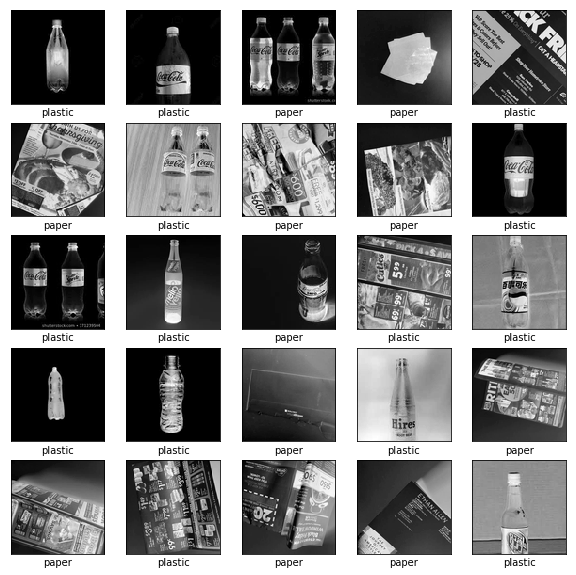

In [21]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()

keep the images you want to classify in 'unknown' folder

(6, 100, 100)
[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 3.6935074e-36]]


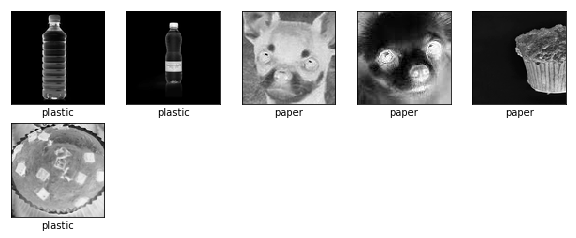

In [22]:
# serialize model to JSON
# model_json = model.to_json()
# with open(rootpath+"\image_classification\model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights(rootpath+"\image_classification\model.h5")
# print("Saved model to disk")



(test_image, label) = load_image_dataset(rootpath+'/image_classification/unknown', maxsize)
print(test_image.shape)

prediction =model.predict(test_image)
print(prediction)
display_images(test_image, np.argmax(prediction, axis = 1))
plt.show()
 